In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# get all raw data
raw_data = pd.read_pickle('clean_data_05102018.pkl')

In [ ]:
# raw_data = raw_data['content2'].apply(lambda x: nltk.word_tokenize(x))
raw_data.head()

In [2]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

In [3]:
# nltk.download('punkt')
import re

In [ ]:
# copy dataframe
raw_data = raw_data[['id', 'content2', 'clean_category']]
ngrams_df = raw_data.copy()

In [ ]:
# define regex for tokenize a words
pattern = r'\w+' #for any word char
pattern2 = r'.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)' #tokenize for camelcase

In [ ]:
# create tokenized text based on whitespace
ngrams_df['tokenized_text'] = ngrams_df['content2'].apply(lambda x: nltk.word_tokenize(x.lower()))

In [ ]:
ngrams_df = ngrams_df[['id', 'clean_category', 'tokenized_text']]

In [ ]:
ngrams_df['tokenized_text'] = ngrams_df['tokenized_text'].apply(lambda x: ','.join(x))

In [ ]:
ngrams_df.reset_index('id', inplace=True)

In [ ]:
ngrams_df.to_pickle('unigrams_after_clean.pkl')

### LOAD ULANG

In [4]:
# ngrams_df = pd.read_pickle('unigrams_after_clean.pkl')
# ngrams_df = pd.read_pickle('clean_data_05102018.pkl')
ngrams_df = pd.read_pickle('CLEAN_DATA_BISMILLAH.pkl')

In [21]:
ngrams_df['word_count_after_prep2'] = ngrams_df['content2'].apply(lambda x: len(str(x).split(" ")))

In [22]:
sum(ngrams_df['word_count_after_prep2'].tolist())

59801756

In [6]:
ngrams_df['content2'] = ngrams_df['content2'].apply(lambda x: x.replace('googletag googletag display', ''))

In [7]:
ngrams_df['content2'] = ngrams_df['content2'].apply(lambda x: x.replace('googletag', ''))

In [9]:
ngrams_df['content2'] = ngrams_df['content2'].apply(lambda x: x.replace('googletag googletag', ''))

In [8]:
ngrams_df['content2'] = ngrams_df['content2'].apply(lambda x: x.replace('googletag display', ''))

In [10]:
ngrams_df['content2'] = ngrams_df['content2'].apply(lambda x: x.replace('large topright', ''))

In [11]:
ngrams_df['content2'] = ngrams_df['content2'].apply(lambda x: x.replace('inter mil', 'inter milan'))

In [13]:
ngrams_df.columns

Index(['id', 'source', 'pubdate', 'month', 'clean_category', 'subcategory',
       'content', 'content2', 'tokenized', 'word_count_after_prep',
       'avg_word_after_prep', 'word_count_after_prep2'],
      dtype='object')

In [15]:
ngrams_df = ngrams_df[['id', 'source', 'pubdate', 'clean_category', 'subcategory', 'content2', 'word_count_after_prep2']]

In [17]:
ngrams_df['tokenized'] = ngrams_df['content2'].apply(lambda x: x.split(' '))

In [13]:
ngrams_df['word_count_after_prep2'] = ngrams_df['tokenized'].apply(lambda x: len(x))

In [20]:
ngrams_df.to_pickle('CLEAN_DATA_BISMILLAH.pkl')

In [9]:
# ngrams_df = [x.split(' ') for x in ngrams_df['content2'].tolist()]

In [5]:
ngrams_df = ngrams_df['tokenized'].tolist()

In [6]:
ngrams_df = [[z for z in y if z.isalpha()] for y in ngrams_df]

In [25]:
# ngrams_df['bigrams'] = ngrams_df['tokenized_text'].apply(lambda x: list(map(' '.join, ngrams(x, 2))))
bi = [list(map(' '.join, ngrams(x, 2))) for x in ngrams_df]

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [7]:
# ngrams_df['trigrams'] = ngrams_df['tokenized_text'].apply(lambda x: list(map(' '.join, ngrams(x, 3))))
tri = [list(map(' '.join, ngrams(x, 3))) for x in ngrams_df]

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: generator 'ngrams' raised StopIteration
  


In [8]:
# from collections import Counter
import wordcloud
# import matplotlib.pyplot as plt

In [9]:
from itertools import chain

## UNIGRAMS

In [ ]:
unigrams = ngrams_df.loc[:, 'tokenized_text'].tolist()

In [11]:
unigrams = list(chain.from_iterable(ngrams_df))

In [12]:
freq_uni = nltk.FreqDist(ch for ch in unigrams)

In [13]:
# take 50 commons ngram 
freq_commons_uni = freq_uni.most_common(50)

In [14]:
tup_uni = tuple(freq_commons_uni)
dict_uni_all = dict((x, y) for x, y in tup_uni)

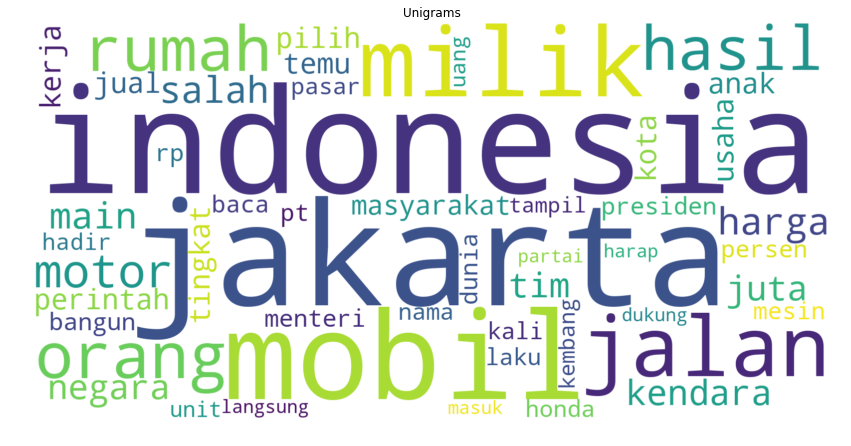

In [15]:
cloud_uni = wordcloud.WordCloud(background_color='white',width=1600, height=800)
cloud_uni.generate_from_frequencies(dict_uni_all)
plt.figure(figsize=(20,6))
plt.title('Unigrams')
plt.imshow(cloud_uni, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## BIGRAMS

In [ ]:
bigrams = ngrams_df.loc[:, 'bigrams'].tolist()

In [28]:
bigrams = list(chain.from_iterable(bi))

In [29]:
freq_bi = nltk.FreqDist(ch for ch in bigrams)

In [30]:
# take 50 commons ngram 
freq_commons_bi = freq_bi.most_common(50)

In [27]:
freq_commons_bi

[('rp juta', 45322),
 ('asian games', 36655),
 ('amerika serikat', 32598),
 ('jawa barat', 26290),
 ('moto gp', 25354),
 ('dki jakarta', 24903),
 ('anak anak', 24013),
 ('jakarta news', 21945),
 ('salah satu', 20951),
 ('all new', 20687),
 ('bahan bakar', 19856),
 ('jakarta selatan', 19463),
 ('joko widodo', 18916),
 ('sepeda motor', 17826),
 ('jakarta pusat', 17766),
 ('rumah sakit', 17381),
 ('undang undang', 17047),
 ('tanah air', 16844),
 ('jawa timur', 16485),
 ('orang orang', 15303),
 ('media sosial', 15039),
 ('presiden joko', 14044),
 ('dolar as', 13828),
 ('harga rp', 13807),
 ('rp miliar', 12792),
 ('piala dunia', 12150),
 ('jalan tol', 11648),
 ('uji coba', 11565),
 ('cetak gol', 11405),
 ('tuan rumah', 11383),
 ('liga champions', 11279),
 ('wakil presiden', 11222),
 ('sepak bola', 11219),
 ('idn times', 11183),
 ('metro jaya', 10703),
 ('rp ribu', 10341),
 ('tindak pidana', 10275),
 ('real madrid', 10213),
 ('korea selatan', 10186),
 ('kendara motor', 10185),
 ('wakil ketua

In [31]:
tup_bi = tuple(freq_commons_bi)
dict_bi_all = dict((x, y) for x, y in tup_bi)

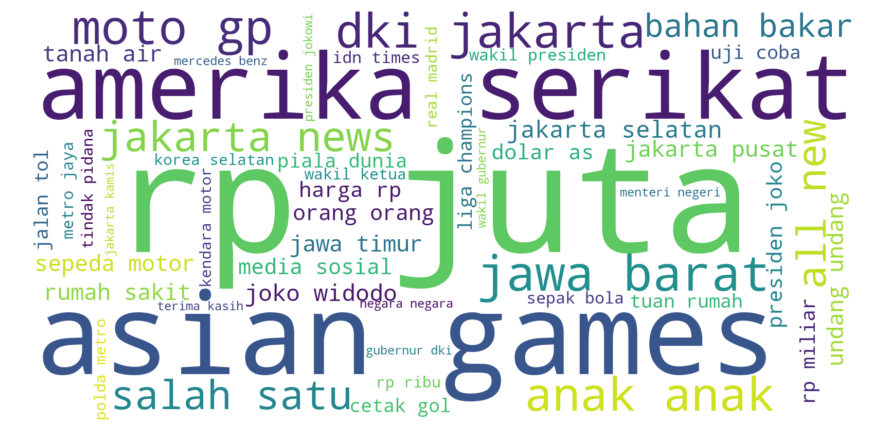

In [32]:
cloud_bi = wordcloud.WordCloud(background_color='white',width=1600, height=800)
cloud_bi.generate_from_frequencies(dict_bi_all)
plt.figure(figsize=(20,6))
# plt.title('Bigrams')
plt.imshow(cloud_bi, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## TRIGRAMS

In [ ]:
trigrams = ngrams_df.loc[:, 'trigrams'].tolist()

In [10]:
trigrams = list(chain.from_iterable(tri))

In [11]:
freq_tri = nltk.FreqDist(ch for ch in trigrams)

In [12]:
# take 50 commons ngram 
freq_commons_tri = freq_tri.most_common(50)

In [13]:
tup_tri = tuple(freq_commons_tri)
dict_tri_all = dict((x, y) for x, y in tup_tri)

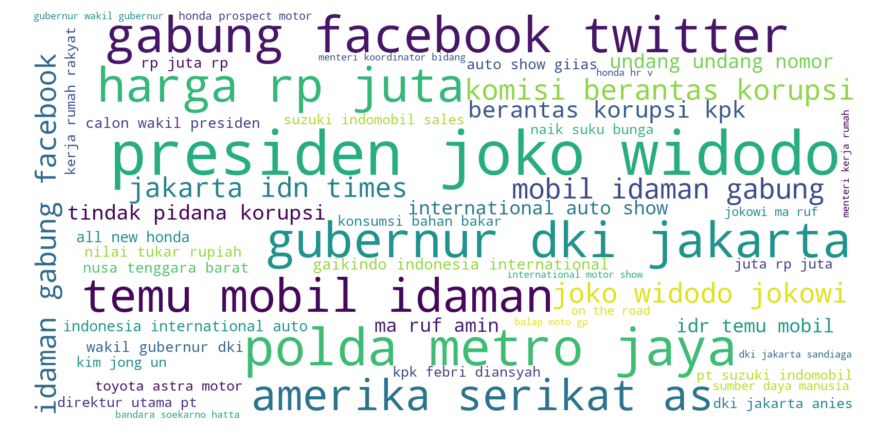

In [14]:
cloud_tri = wordcloud.WordCloud(background_color='white',width=1600, height=800)
cloud_tri.generate_from_frequencies(dict_tri_all)
plt.figure(figsize=(20,6))
# plt.title('Trigrams')
plt.imshow(cloud_tri, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# HITUNG BANYAK KATA

In [ ]:
raw_data = pd.read_csv("article_201809061411.csv")

In [ ]:
raw_data['word_count'] = raw_data['content'].apply(lambda x: len(str(x).split(" ")))

In [ ]:
sum(raw_data.word_count)

## After Stemming

In [ ]:
# get all raw data
data = pd.read_pickle('all_data_clean_after_stemming.pkl')

In [ ]:
sum(data.word_count_after_prep)

In [ ]:
print(raw_data.iloc[1]['content'])

In [ ]:
print(data.iloc[1]['content2'])

In [ ]:
def viterbi_segment(text):
    """
    Using Viterbi Algorithm: https://en.wikipedia.org/wiki/Viterbi_algorithm
    """
    probs, lasts = [1.0], [0]
    for i in range(1, len(text) + 1):
        prob_k, k = max((probs[j] * word_prob(text[j:i]), j)
                        for j in range(max(0, i - max_word_length), i))
        probs.append(prob_k)
        lasts.append(k)
    words = []
    i = len(text)
    while 0 < i:
        words.append(text[lasts[i]:i])
        i = lasts[i]
    words.reverse()
    return words, probs[-1]

def word_prob(word): return dictionary[word] / total
def words(text): return re.findall('[a-z]+', text.lower())

In [ ]:
from collections import Counter
import re

In [ ]:
dictionary = Counter(words(open('dict.txt').read()))
# my_dict = pd.read_table('dict.txt')['lemma']
max_word_length = max(map(len, dictionary))
total = float(sum(dictionary.values()))


In [ ]:
viterbi_segment('fasilitasinstallmentmerupakan')

In [ ]:
tes = pd.read_csv('article_201809061411.csv')

In [ ]:
tes_oto = tes[(tes.source == 'seva') & (tes.category == 'otomotif')]

# HANDLE DATA ILANG

In [ ]:
# get all raw data
data = pd.read_pickle('all_data_clean_after_stemming.pkl')

In [ ]:
oto_seva.head()

In [ ]:
oto_seva.groupby('subcategory').agg({'string_content': lambda x: ','.join(x)})

In [ ]:
oto_seva.tail()

In [ ]:
gab = tes_oto.merge(oto_seva, on='id', how='outer', suffixes=['', '_'], indicator=True)

In [ ]:
tes_oto.loc[tes_oto.id == 1089, 'tags'] = 'asuransi mobil baru,asuransi untuk mobil,bagaimana asuransi mobil'

In [ ]:
tes_oto[tes_oto.id == 1089]

In [ ]:
data.head()

In [ ]:
import os
cwd = os.getcwd()
os.chdir("D:\\OJT FILES\\article-clustering\\Classification")

import DataPreparation as dp
dp_obj = dp.DataPreparation()

In [ ]:
from nltk import word_tokenize

In [ ]:
from lib.Sastrawiv2.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def cleansing_pipeline(test_data):
    test_data['content'] = test_data[['source', 'category', 'content']].apply(dp_obj.cleansing_content, axis=1)
    # remove common trigrams in property category article
    test_data.loc[test_data.category=='properti', 'content'] = test_data.loc[test_data.category=='properti', 'content'].apply(lambda x : dp_obj.remove_trigrams(x))

    # tokenize
    test_data['tokenized'] = test_data['content'].apply(lambda x : word_tokenize(x))

    # remove stopwords
    test_data['tokenized'] = test_data['tokenized'].apply(lambda x : dp_obj.remove_stopwords(x))
    
    test_data['content2'] = test_data['tokenized'].apply(lambda x : ' '.join(x))
    #stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    test_data['content2'] = test_data['content2'].apply(lambda x : stemmer.stem(x))
    
    return test_data

In [ ]:
outlier = cleansing_pipeline(tes_oto[tes_oto.id == 1089])

In [ ]:
outlier['word_count'] = outlier['content'].apply(lambda x: len(str(x).split(" ")))
outlier['avg_word'] = outlier['content'].apply(lambda x: dp_obj.avg_word(x))
outlier['word_count_after_prep'] = outlier['content2'].apply(lambda x: len(str(x).split(" ")))
outlier['avg_word_after_prep'] = outlier['content2'].apply(lambda x: dp_obj.avg_word(x))

In [ ]:
outlier.columns = ['id', 'post_id', 'author', 'pubdate', 'clean_category', 'subcategory',
       'content', 'comments', 'images', 'title', 'tags', 'url', 'source',
       'is_popular', 'tokenized', 'content2', 'word_count', 'avg_word',
       'word_count_after_prep', 'avg_word_after_prep']

In [ ]:
data.head(1)

In [ ]:
gabungan = pd.concat([data,outlier[['id', 'content2','pubdate', 'clean_category', 'source', 'word_count', 'avg_word', 'word_count_after_prep', 'avg_word_after_prep']]], axis=0)

In [ ]:
gabungan.head()

In [ ]:
gab1 = pd.merge(gabungan, tes[['id','subcategory']], on='id', how='inner')

In [ ]:
gab1.to_pickle('all_data_clean_after_stemming_baru.pkl')

# BUAT KEYWORDS

In [ ]:
data = pd.read_pickle('all_data_clean_after_stemming_baru.pkl')

In [ ]:
oto_seva = data[(data.clean_category == 'otomotif') & (data.source == 'seva')]

In [ ]:
oto_seva_group = oto_seva.groupby('subcategory').agg({'content2': lambda x: ' '.join(x)})

In [ ]:
oto_seva_group["content2"] = oto_seva_group["content2"].apply(lambda x: x.split(' '))

In [ ]:
import nltk

In [ ]:
oto_seva_group['freq'] = oto_seva_group['content2'].apply(lambda x: nltk.FreqDist(ch for ch in x))

In [ ]:
oto_seva_group['common_100'] = oto_seva_group['freq'].apply(lambda x: x.most_common(100))

In [ ]:
oto_seva_group.index = ['berita_otomotif', 'berita_terbaru', 'hobi_komunitas', 'keuangan',
       'modifikasi', 'review_otomotif', 'tips_rekomendasi',
       'travel_lifestyle']

In [ ]:
i = 0
for index, row in oto_seva_group.iterrows():
    exec(index.split("-")[0]+" = pd.DataFrame(oto_seva_group.loc['"+index+"']['common_100'], columns=['"+index+"_0','"+index+"_1'])")
    i = i+1

In [ ]:
pd.concat([berita_otomotif_keyword, berita_terbaru_keyword, hobi_komunitas_keyword, keuangan_keyword, modifikasi_keyword, review_otomotif_keyword, tips_rekomendasi_keyword, travel_lifestyle_keyword], axis=1).to_csv('kata_seva.csv')

In [ ]:
t = (0,1)

In [ ]:
t[0]